In [16]:
%load_ext autoreload
%autoreload 2
%load_ext heat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The heat extension is already loaded. To reload it, use:
  %reload_ext heat


In [17]:
import ipas
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
import time
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, progress
import dask
from mpl_toolkits.mplot3d import Axes3D
from shapely.ops import nearest_points
from pyquaternion import Quaternion
import copy as cp
from scipy import spatial 
from shapely.geometry import Point
from shapely.ops import nearest_points
import pandas as pd
from dask import dataframe as dd
import pickle
import scipy.stats as st
import datetime

In [3]:
cluster = SLURMCluster(
queue='kratos',
walltime='04-23:00:00',
cores=1,
memory='20000MiB', #1 GiB = 1,024 MiB
processes=1)

cluster.scale(20)
client = Client(cluster)
print(client)

<Client: 'tcp://169.226.65.97:45843' processes=0 threads=0, memory=0 B>


In [12]:
client

{'tcp://169.226.65.81:40507': {'type': 'Worker',
  'id': 15,
  'host': '169.226.65.81',
  'resources': {},
  'local_directory': '/network/rit/lab/sulialab/share/IPAS_3radii/collection_no_db/worker-qb4dz1hf',
  'name': 15,
  'nthreads': 1,
  'memory_limit': 20970000000,
  'last_seen': 1588166102.8217986,
  'services': {'dashboard': 46555},
  'metrics': {'cpu': 0.0,
   'memory': 103706624,
   'time': 1588166102.8212776,
   'read_bytes': 4169.224541656676,
   'write_bytes': 7232.532722431811,
   'num_fds': 27,
   'executing': 0,
   'in_memory': 0,
   'ready': 0,
   'in_flight': 0,
   'bandwidth': {'total': 100000000, 'workers': {}, 'types': {}}},
  'nanny': 'tcp://169.226.65.81:38607'},
 'tcp://169.226.65.77:44353': {'type': 'Worker',
  'id': 19,
  'host': '169.226.65.77',
  'resources': {},
  'local_directory': '/network/rit/lab/sulialab/share/IPAS_3radii/collection_no_db/worker-ob7th7gc',
  'name': 19,
  'nthreads': 1,
  'memory_limit': 20970000000,
  'last_seen': 1588166102.668981,
  '

In [18]:
def main():
    output = np.empty((len(phioarr),len(reqarr)),dtype=object)
    for phi in range(len(phioarr)):
        for r in range(len(reqarr)):
            #output[phi,r] = dask.delayed(ipas.collect_clusters)(phioarr[phi], reqarr[r], nclusters, ncrystals,rand_orient)
            ipas.collect_clusters(phioarr[phi], reqarr[r], nclusters, ncrystals,rand_orient)
#     delayeds = client.compute(delayeds)
#     output = client.gather(delayeds)
    
    return output

In [31]:
def compute():
    agg_as = np.empty((len(phioarr),len(reqarr), nclusters))
    agg_bs = np.empty((len(phioarr),len(reqarr), nclusters))
    agg_cs = np.empty((len(phioarr),len(reqarr), nclusters))
    phi2Ds = np.empty((len(phioarr),len(reqarr), nclusters))
    cplxs = np.empty((len(phioarr),len(reqarr), nclusters))
    dds = np.empty((len(phioarr),len(reqarr), nclusters))
    major_ax_zs = np.empty((len(phioarr),len(reqarr), nclusters))
    depths = np.empty((len(phioarr),len(reqarr), nclusters))
    
    gather = client.compute([*output.tolist()])  #only parallelizing agg r bins
    gather = client.gather(gather)

    gather = np.array(gather)
    print(np.shape(gather))
    agg_as = gather[:,:,0,:]
    agg_bs = gather[:,:,1,:]
    agg_cs = gather[:,:,2,:]
    phi2Ds = gather[:,:,3,:]
    cplxs = gather[:,:,4,:] 
    dds = gather[:,:,5,:]
    major_ax_zs = gather[:,:,6,:]
    depths = gather[:,:,7,:]
    print('DONE!')
    return agg_as, agg_bs, agg_cs, phi2Ds, cplxs, dds, major_ax_zs, depths

In [67]:
if __name__ == '__main__':
    phioarr=np.logspace(-2, 2, num=20, dtype=None)#just columns (0,2); plates (-2,0)
    #phioarr = [ .01, 10]
    reqarr = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]
    #reqarr = [10]
    nclusters = 3         #changes how many aggregates per aspect ratio to consider
    ncrystals = 2
    rand_orient = True      #randomly orient the seed crystal and new crystal: uses first random orientation
    
    output = main()
    agg_as, agg_bs, agg_cs, phi2Ds, cplxs, dds, major_ax_zs, depths = compute()

nclus 1 0.01 0
2.5980762113533156 10.882796185403265
0.004910133445392904 0.23873241463788777 -0.23382228119249487
2.5980762113533156 10.88279618540245
2.5980762113533156 10.882796185405217
0.006641525815307437 0.23873241463784495 -0.2320908888225375
made it to the end of collect_clusters loops
nclus 2 0.01 0
20.784609690826525 87.06236948323864
20.784609690826525 87.06236948325179
0.008058581671077822 0.2387324146378174 -0.23067383296673957
20.784609690826525 87.06236948322592
0.005751187648175742 0.2387324146378883 -0.23298122698971255
made it to the end of collect_clusters loops
nclus 3 0.01 0
70.1480577065395 293.8354970059149
0.006840091311529136 0.23873241463786601 -0.23189232332633689
70.1480577065395 293.8354970059014
0.005433736986353794 0.23873241463787695 -0.23329867765152315
70.1480577065395 293.8354970059609
0.004638646125340617 0.2387324146378286 -0.23409376851248798
made it to the end of collect_clusters loops
nclus 4 0.01 0
166.2768775266122 696.4989558661589
0.00537756

KeyboardInterrupt: 

In [141]:
#import bz2
#sfile = bz2.BZ2File('smallerfile', 'w')
with open('../instance_files/instance_iceice_flat_rall_major_depth', "ab") as f:
    for data in agg_as, agg_bs, agg_cs, phi2Ds, cplxs, dds, major_ax_zs, depths:
        pickle.dump(data, f)

### LOAD DATA BACK IN

In [71]:
f = open('../instance_files/instance_iceice_flat_rall_major_depth', 'rb')
agg_as = pickle.load(f)
agg_bs = pickle.load(f)
agg_cs = pickle.load(f)
phi2Ds = pickle.load(f)
cplxs = pickle.load(f)
dds = pickle.load(f)
major_ax_zs = pickle.load(f)
depths = pickle.load(f)
f.close()

In [61]:
def calculate_error(data, numaspectratios, ch):
    mean = np.mean(data)

    std = np.std(data)
    shape = (mean/std)**2
    scale = (std**2)/mean
    shapech = mean/(numaspectratios*ch)

    pos_error = mean + std
    neg_error = mean - std

    min_data = min(data)
    max_data = max(data)

    return(pos_error, neg_error, min_data, max_data, mean)   

def mode_of_hist(data):
    bins = (np.max(data) - np.min(data))/0.01
    n, bins, patches = plt.hist(data, bins=int(bins), normed=True,
                                color='navy',range=(min(data), max(data)))
    mode = bins[np.where(n == np.max(n))]

    return mode[0]

def fit_distribution(data, normed = True, facecolor='navy', alpha=1.0, axes=None, **kwargs):

    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    data[np.isinf(data)] = min(data)
    data[np.isnan(data)] = min(data)
    data= data[(data<np.quantile(data, .98)) & (data>np.quantile(data, .01))]
    
    # Get histogram of original data
    y, x = np.histogram(data, density=True)
    params = st.gamma.fit(data)
    arg = params[:-2]       

    fit_alpha, fit_loc, fit_beta=st.gamma.fit(data)
    pdf = st.gamma.pdf(x, a=fit_alpha, loc=fit_loc, scale=fit_beta)
    indmax = np.argmax(pdf)  #FIRST index where the highest prob occurs
    gammach_var = x[indmax] #characteristic of the distribution
    if axes is not None:
        n, bins, patches = plt.hist(data, bins=70, normed=True,
                                color='navy',**kwargs)

        ax = plt.plot(x, pdf, lw=5, color='darkorange')
        plt.ylim(0,max(n))
        plt.show()

    return gammach_var

/network/rit/lab/sulialab/share/bin/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


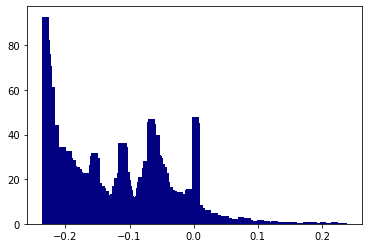

In [72]:
#find characteristic of gamma distribution
numaspectratios=len(agg_as[:,0,0])
numrs=len(agg_bs[0,:,0])
agg_cs_ch = np.empty((numaspectratios, numrs), dtype=np.float64) #major
agg_as_ch = np.empty((numaspectratios, numrs), dtype=np.float64) #minor
agg_as_mean = np.empty((numaspectratios, numrs), dtype=np.float64)
dds_mode = np.empty((numaspectratios, numrs), dtype=np.float64)
major_ax_zs_ch = np.empty((numaspectratios, numrs), dtype=np.float64)
major_ax_zs_mean = np.empty((numaspectratios, numrs), dtype=np.float64)
depths_ch = np.empty((numaspectratios, numrs), dtype=np.float64)

# fig = plt.figure(figsize=(5,7))
# ax = plt.subplot(131)

for i in range(numaspectratios):
    for r in range(numrs):
        #print(i,r)
        for c, data in enumerate([agg_cs, agg_as, dds, major_ax_zs, depths]):
            if c == 0:
                agg_cs_ch[i,r] = fit_distribution(data[i,r,:])
            if c == 1:
                agg_as_ch[i,r] = fit_distribution(data[i,r,:])
                _,_,_,_,agg_as_mean[i,r] = calculate_error(data[i,r,:], numaspectratios, agg_as_ch[i,r])
            if c == 2:
                #dds_ch[i,r] = fit_distribution(data[i,r,:])
                dds_mode[i,r] = mode_of_hist(data[i,r])
            if c == 3:
                major_ax_zs_ch[i,r] = fit_distribution(data[i,r,:])
                _,_,_,_,major_ax_zs_mean[i,r] = calculate_error(data[i,r,:], numaspectratios, agg_as_ch[i,r])
            if c == 4:
                depths_ch[i,r] = fit_distribution(data[i,r,:])
                


In [76]:
#write to file for output as array:
with open("../lookup_tables/ice_ice/newformat_minorax_ellipsoid_flat_ch.dat","w") as file1:
    with open("../lookup_tables/ice_ice/newformat_majorax_ellipsoid_flat_ch.dat","w") as file2:
        with open("../lookup_tables/ice_ice/newformat_majorax_ellipsoid_flat_mean.dat","w") as file3:
            with open("../lookup_tables/ice_ice/newformat_dd_flat_mode.dat","w") as file4:
                with open ("../lookup_tables/ice_ice/newformat_majorax_ellipse_z_flat_ch.dat","w") as file5:
                    with open ("../lookup_tables/ice_ice/newformat_majorax_ellipse_z_flat_mean.dat","w") as file6:
                        with open ("../lookup_tables/ice_ice/newformat_depth_flat_ch.dat","w") as file7:
                        
                            file1.write('Ice-Ice collection for the flat orientation. \n'\
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Minor axis taken as the smallest axis from the fit-ellipsoid \n'\
                                        'Order: phi, r, value \n')
                            
                            file2.write('Ice-Ice collection for the flat orientation. \n'
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Major axis taken as the largest axis from the fit-ellipsoid \n'
                                        'Order: phi, r, value \n')
                                
                            file3.write('Ice-Ice collection for the flat orientation. \n'
                                        'Mean value taken from the average across 300 aggregates. \n'\
                                        'Major axis taken as the largest axis from the fit-ellipsoid \n'
                                        'Order: phi, r, value \n')
                                
                            file4.write('Ice-Ice collection for the flat orientation. \n'
                                        'Volume ratio of monomer (not 1.0) subtracted from volume ratio of agg (Vagg/Vellipse)\n'\
                                        'Mode from 300 aggregates. \n'\
                                        'Order: phi, r, value \n')
                                
                            file5.write('Ice-Ice collection for the flat orientation. \n'\
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Major axis taken from a fit-ellipse (2D) in the z-orientation. \n'
                                        'Order: phi, r, value \n')
                                
                            file6.write('Ice-Ice collection for the flat orientation. \n'
                                        'Mean value taken from the average across 300 aggregates. \n'\
                                        'Major axis taken from a fit-ellipse (2D) in the z-orientation. \n'
                                        'Order: phi, r, value \n')
                                
                            file7.write('Ice-Ice collection for the flat orientation. \n'
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Depth measured as max z point - min z point. \n'
                                        'Order: phi, r, value \n')

                            for i in range(len(phioarr)):
                                for r in range(len(reqarr)):
                                    #print(i,r)
                                    file1.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  agg_cs_ch[i,r]))
                                    file2.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  agg_as_ch[i,r]))
                                    file3.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  agg_as_mean[i,r]))
                                    file4.write('%.3f %.2f %.4f \n' %(phioarr[i], reqarr[r],  dds_mode[i,r]))
                                    file5.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  major_ax_zs_ch[i,r]))
                                    file6.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  major_ax_zs_mean[i,r]))
                                    file7.write('%.3f %.2f %.4f \n' %(phioarr[i], reqarr[r],  depths_ch[i,r]))

file1.close()
file2.close() 
file3.close()
file4.close()
file5.close()
file6.close()
file7.close()

In [70]:
#write to file for output as array:
with open("../lookup_tables/ice_ice/newformat_minorax_ellipsoid_rand_ch.dat","w") as file1:
    with open("../lookup_tables/ice_ice/newformat_majorax_ellipsoid_rand_ch.dat","w") as file2:
        with open("../lookup_tables/ice_ice/newformat_majorax_ellipsoid_rand_mean.dat","w") as file3:
            with open("../lookup_tables/ice_ice/newformat_dd_rand_mode.dat","w") as file4:
                with open ("../lookup_tables/ice_ice/newformat_majorax_ellipse_z_rand_ch.dat","w") as file5:
                    with open ("../lookup_tables/ice_ice/newformat_majorax_ellipse_z_rand_mean.dat","w") as file6:
                        with open ("../lookup_tables/ice_ice/newformat_depth_rand_ch.dat","w") as file7:
                        
                            file1.write('Ice-Ice collection for the random orientation. \n'\
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Minor axis taken as the smallest axis from the fit-ellipsoid \n'\
                                        'Order: phi, r, value \n')
                            
                            file2.write('Ice-Ice collection for the random orientation. \n'
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Major axis taken as the largest axis from the fit-ellipsoid \n'
                                        'Order: phi, r, value \n')
                                
                            file3.write('Ice-Ice collection for the random orientation. \n'
                                        'Mean value taken from the average across 300 aggregates. \n'\
                                        'Major axis taken as the largest axis from the fit-ellipsoid \n'
                                        'Order: phi, r, value \n')
                                
                            file4.write('Ice-Ice collection for the random orientation. \n'
                                        'Volume ratio of monomer (not 1.0) subtracted from volume ratio of agg (Vagg/Vellipse)\n'\
                                        'Mode from 300 aggregates. \n'\
                                        'Order: phi, r, value \n')
                                
                            file5.write('Ice-Ice collection for the random orientation. \n'\
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Major axis taken from a fit-ellipse (2D) in the z-orientation. \n'
                                        'Order: phi, r, value \n')
                                
                            file6.write('Ice-Ice collection for the random orientation. \n'
                                        'Mean value taken from the average across 300 aggregates. \n'\
                                        'Major axis taken from a fit-ellipse (2D) in the z-orientation. \n'
                                        'Order: phi, r, value \n')
                                
                            file7.write('Ice-Ice collection for the random orientation. \n'
                                        'Characteristic values taken from the peak of a fit \n'\
                                        'gamma distribution from 300 aggregates. \n'\
                                        'Depth measured as max z point - min z point. \n'
                                        'Order: phi, r, value \n')

                            for i in range(len(phioarr)):
                                for r in range(len(reqarr)):
                                    #print(i,r)
                                    file1.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  agg_cs_ch[i,r]))
                                    file2.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  agg_as_ch[i,r]))
                                    file3.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  agg_as_mean[i,r]))
                                    file4.write('%.3f %.2f %.4f \n' %(phioarr[i], reqarr[r],  dds_mode[i,r]))
                                    file5.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  major_ax_zs_ch[i,r]))
                                    file6.write('%.3f %.2f %.2f \n' %(phioarr[i], reqarr[r],  major_ax_zs_mean[i,r]))
                                    file7.write('%.3f %.2f %.4f \n' %(phioarr[i], reqarr[r],  depths_ch[i,r]))

file1.close()
file2.close() 
file3.close()
file4.close()
file5.close()
file6.close()
file7.close()

In [75]:
df = pd.DataFrame(agg_cs_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_minorax_ellipsoid_flat_ch.dat', sep='\t')

df = pd.DataFrame(agg_as_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipsoid_flat_ch.dat', sep='\t')

df = pd.DataFrame(agg_as_mean, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipsoid_flat_mean.dat', sep='\t')

df = pd.DataFrame(dds_mode, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_dd_flat_mode.dat', sep='\t')

df = pd.DataFrame(major_ax_zs_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipse_z_flat_ch.dat', sep='\t')

df = pd.DataFrame(major_ax_zs_mean, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipse_z_flat_mean.dat', sep='\t')

df = pd.DataFrame(depths_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_depth_flat_ch.dat', sep='\t')


In [68]:
df = pd.DataFrame(agg_cs_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_minorax_ellipsoid_rand_ch.dat', sep='\t')

df = pd.DataFrame(agg_as_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipsoid_rand_ch.dat', sep='\t')

df = pd.DataFrame(agg_as_mean, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipsoid_rand_mean.dat', sep='\t')

df = pd.DataFrame(dds_mode, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_dd_rand_mode.dat', sep='\t')

df = pd.DataFrame(major_ax_zs_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipse_z_rand_ch.dat', sep='\t')

df = pd.DataFrame(major_ax_zs_mean, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_majorax_ellipse_z_rand_mean.dat', sep='\t')

df = pd.DataFrame(depths_ch, index=phioarr, columns=reqarr)
df.to_csv('../lookup_tables/ice_ice/oldformat_depth_rand_ch.dat', sep='\t')
